In [34]:
### 텐서 생성 및 변환

import torch
print(torch.tensor([[1,2],[3,4]]))  # 2차원 형태의 텐서 생성
print(torch.tensor([[1,2],[3,4]], device="cuda:0"))  # GPU에 텐서 생성
print(torch.tensor([[1,2],[3,4]], dtype=torch.float64))  # dtpye을 이용해 텐서 생성

temp = torch.tensor([[1,2],[3,4]])
print(temp.numpy())  # 텐서를 ndarray로 변환
temp = torch.tensor([[1,2],[3,4]], device="cuda:0")
print(temp.to("cpu").numpy())  # GPU 상의 텐서를 CPU로 변환 후, ndarray로 변환

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [35]:
### 텐서의 인덱스 조작

temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7])  # 파이토치로 1차원 벡터 생성
print(temp[0], temp[1], temp[-1])
print(temp[2:5], temp[4:-1])

tensor(1.) tensor(2.) tensor(7.)
tensor([3., 4., 5.]) tensor([5., 6.])


In [4]:
### 텐서 연산
# 텐서 간 타입이 다르면 연산 불가능

v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])
print(w - v)  # 길이가 같은 벡터 간 뺄셈 연산

tensor([2, 2, 3])


In [5]:
### 텐서 차원 조작
# 텐서의 차원을 변경하는 가장 대표적인 방법: view
# view: 넘파이의 reshape와 유사
# cat: 다른 길이의 텐서로 하나로 병합
# transpose: 행렬의 전치 외에도, 차원의 순서를 변경할 때 사용

temp = torch.tensor([  # 2*2 행렬 생성
    [1, 2], [3, 4]
])

print(temp.shape)
print('------------------------')
print(temp.view(4,1))  # 2*2 행렬을 4*1로 변형
print('------------------------')
print(temp.view(-1))  # 2*2 행렬을 1차원 벡터로 변형
print('------------------------')
print(temp.view(1, -1))
print('------------------------')
print(temp.view(-1, 1))

torch.Size([2, 2])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])
------------------------
tensor([1, 2, 3, 4])
------------------------
tensor([[1, 2, 3, 4]])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])


In [41]:
# ### 데이터 준비

# #1. 단순하게 파일을 불러와서 사용
# import pandas as pd
# import torch
# data = pd.read_csv('../class2.csv')
# # CSV 파일의 x, y 칼럼의 값을 넘파이 배열로 받아 Tensor로 바꿔줌
# x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
# y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()

# #2. 커스텀 데이터셋을 만들어서 사용
# # 데이터를 한번에 다 부르지 않고, 조금씩 나누어 불러서 사용하는 방식
# import pandas as pd
# import torch
# from torch.utils.data import Dataset
# from torch.utils.data import DataLoader

# class CustomDataset(Dataset):
#   def __init__(self, csv_file):
#     self.label = pd.read_csv(csv_file)

#   def __len__(self):
#     return len(self.label)

#   def __getitem__(self, idx):
#     sample = torch.tensor(self.label.iloc[idx, 0:3]).int()
#     label = torch.tensor(self.label.iloc[idx, 3]).int()
#     return sample, label

# tensor_dataset = CustomDataset('../covtype.csv')
# dataset = DataLoader(tensor_dataset, batch_size=4, shuffle=True)

In [46]:
### MNIST 데이터셋 내려받기

import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])  # 평균이 0.5, 표준편차가 1.0이 되도록 데이터의 분포를 조정

from torchvision.datasets import MNIST
import requests

download_root = "./data"

train_dataset = MNIST(root=download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(root=download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(root=download_root, transform=mnist_transform, train=True, download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 58.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.70MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 15.1MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.08MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### 데이터셋 설명
- price: 자동차 가격
- maint: 자동차 유지 비용
- doors: 자동차 문 개수
- persons: 수용 인원
- lug_capacity: 수하물 용량
- safety: 안전성
- output: 차 상태(unacc / acc/ good / vgood)

### 6개 칼럼을 이용해 마지막 칼럼 예측하기

In [6]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
dataset = pd.read_csv('car_evaluation.csv')

Saving car_evaluation.csv to car_evaluation.csv


In [8]:
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

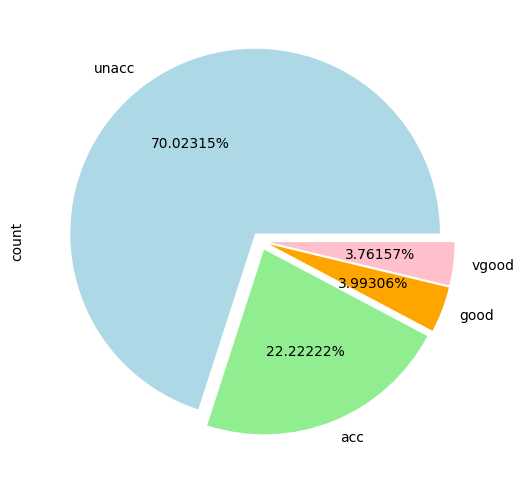

In [30]:
### 데이터셋을 이해하기 쉽도록 분포 형태로 시각화

fig_size = plt.rcParams["figure.figsize"]
fig_size = (8, 6)
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

### 양호한 상태의 자동차 비율이 매우 낮은 것 확인 가능
# unacc: 허용 불가 수준
# acc: 허용 가능 수준
# good: 좋음
# vgood: very good, 매우 좋음

In [10]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

In [31]:
### astpye() 메서드를 이용하여 데이터를 범주형으로 변환
# 참고) 이 예제에서 사용하는 데이터는 모두 범주형 데이터
for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

In [12]:
### 파이토치를 이용해 모델 학습을 해야 하므로
### -> 범주형 데이터를 텐서로 변환
# 변환 절차: 범주형 데이터 -> dataset[category] -> ndarray -> tensor
# cat.codes: 범주형 데이터 -> 넘파이 배열 변환
# np.stack: 두 개 이상의 넘파이 객체 합치기

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]  # 배열로 변환된 열 개의 행 출력

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [13]:
# torch 모듈을 이용해 배열을 탠서로 변환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [15]:
# 레이블로 사용할 칼럼에 대해서도, 똑같이 텐서로 변환
# 이때 넘파이 배열로 변환 시 get_dummies 사용
# get_dummies: 가변수로 만들어 주는 함수 (문자를 숫자 0, 1로 바꿈)

outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [16]:
# 높은 차원의 워드 임베딩일수록 -> 단어 간 세부적 관계 잘 파악
# => 따라서, 단일 숫자로 변환된 넘파이 배열을 N차원으로 변경하여 사용
# 보편적인 임베딩 크기 규칙: 칼럼의 고유 값 수 / 2
# ex) price 칼럼은 네 개의 고유 값을 가짐 -> 임베딩 크기는 4/2 = 2

categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [17]:
# 데이터셋 분리

total_records = 1728
test_records = int(total_records * .2)  # 전체 데이터의 20%를 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [18]:
# 데이터셋이 잘 분리되었는지 확인하기 위해, 레코드 개수 출력

print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [19]:
### 데이터 준비 끝! 모델의 네트워크 생성

class Model(nn.Module):  # 클래스 형태로 구현되는 모델은 nn.Module을 상속받음
    def __init__(self, embedding_size, output_size, layers, p=0.4):  # 초기화
        super().__init__()  # 부모 클래스에 접근 시 사용 / self를 사용하지 않음!
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols

        for i in layers:  # for 문으로 각 계층을 all_layers 목록에 추가
            all_layers.append(nn.Linear(input_size, i))  # 선형 계층: y = Wx + b
            all_layers.append(nn.ReLU(inplace=True))  # 활성화 함수
            all_layers.append(nn.BatchNorm1d(i))  # 배치 정규화
            all_layers.append(nn.Dropout(p))  # 과적합 방지
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    # forward()는 모델 객체를 데이터와 함께 호출하면 자동으로 실행됨
    def forward(self, x_categorical):  # 학습 데이터를 입력받아 연산 진행
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

### __init__() 뜯어보기
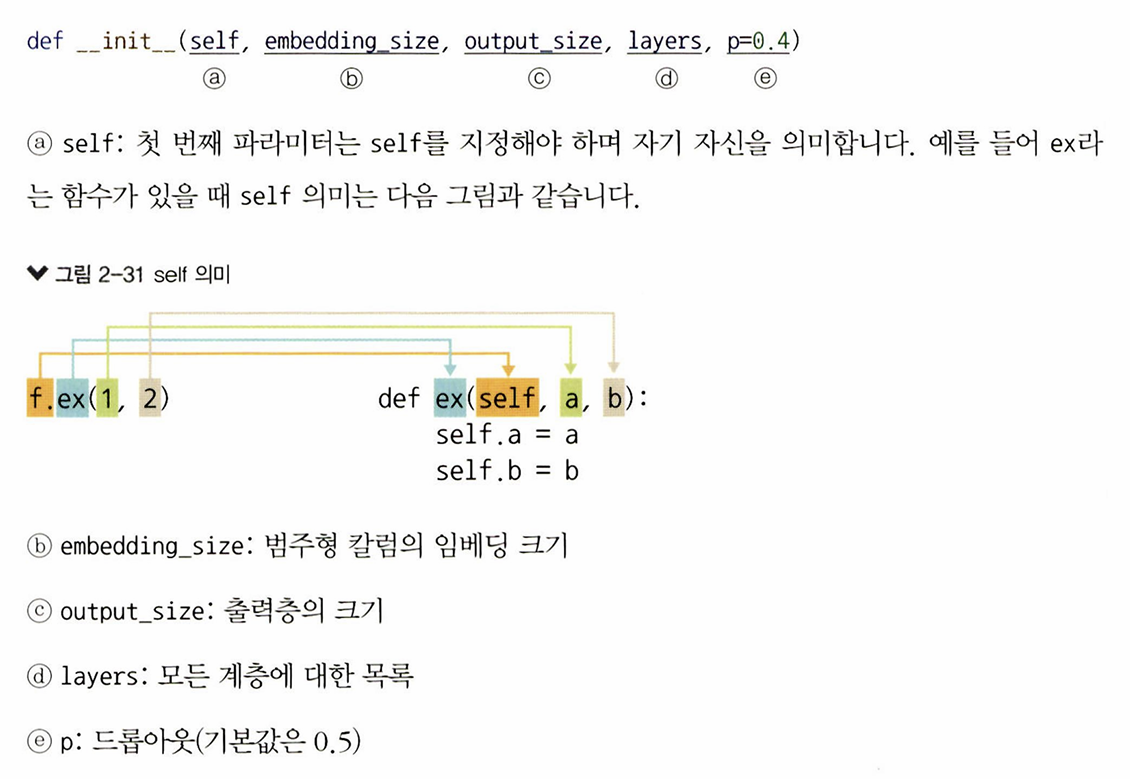

In [20]:
# Model 클래스의 객체 생성
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)  # 모델에 대한 구조(네트워크) 확인

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [21]:
### 모델의 파라미터 정의
# 모델을 훈련시키기 전, 손실 함수와 옵티마이저에 대해 정의해야 함

loss_function = nn.CrossEntropyLoss()  # 분류 태스크이므로 crossentropy
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # 옵티마이저 Adam

In [22]:
### CPU/GPU 사용 지영

if torch.cuda.is_available():
    device = torch.device('cuda')  # GPU가 있다면 GPU를 사용
else:
    device = torch.device('cpu')  # GPU가 없다면 CPU를 사용

In [23]:
### 모델 학습

epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)

# 각 반복마다 손실 함수가 오차를 계산
for i in range(epochs):  # 에포크 500이므로, 500회 반복됨
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)  # 반복할 때마다 오차를 aggregated_losses에 추가

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()  # 가중치 업데이트 위해 손실 함수의 backward() 메서드 호출
    optimizer.step()  # 옵티마이저 함수의 step()메서드 이용해 기울기 업데이트

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')  # 오차가 25 에포크마다 출력됨

epoch:   1 loss: 1.61585331
epoch:  26 loss: 1.37928498
epoch:  51 loss: 1.29069793
epoch:  76 loss: 1.19348693
epoch: 101 loss: 1.06504786
epoch: 126 loss: 0.94441962
epoch: 151 loss: 0.81156898
epoch: 176 loss: 0.74782461
epoch: 201 loss: 0.69736123
epoch: 226 loss: 0.66755265
epoch: 251 loss: 0.63593030
epoch: 276 loss: 0.62270927
epoch: 301 loss: 0.59964550
epoch: 326 loss: 0.60347301
epoch: 351 loss: 0.59525245
epoch: 376 loss: 0.58838695
epoch: 401 loss: 0.58260632
epoch: 426 loss: 0.58245301
epoch: 451 loss: 0.57757151
epoch: 476 loss: 0.58153898
epoch: 500 loss: 0.5731851459


In [24]:
### 테스트 데이터셋으로 모델 예측

test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data).to(device)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

## Loss: 0.54928291
# 테스트용 데이터셋에 대한 loss 값이 훈련 데이터셋에서 도출된 loss값과 비슷
# -> 과적합은 발생하지 않았다고 판단 가능

Loss: 0.54928291


In [25]:
### 모델의 예측 확인

print(y_val[:5])
# 앞서 모델 네트워크의 output_size에 4를 지정했으므로,
# 즉, 출력층에 네 개의 뉴런이 포함되도록 지정했으므로
# -> 각 예측에는 4개의 값이 포함될 것

tensor([[ 2.9643,  1.6238, -4.3376, -4.2033],
        [ 2.4519,  1.1618, -3.1029, -2.8339],
        [ 4.7197,  3.5156, -4.8939, -5.6918],
        [ 3.2375,  1.8624, -4.4346, -4.4425],
        [ 2.9935,  2.0883, -2.3963, -2.2379]], device='cuda:0')


In [27]:
### 가장 큰 값을 갖는 인덱스 확인
# *실제 값이 아닌, 인덱스를 찾는 것임!

y_val = np.argmax(y_val.cpu().numpy(), axis=1)
print(y_val[:5])

## [0 0 0 0 0]
# 인덱스가 0인 값이 인덱스가 1인 값보다 크므로, 처리된 출력이 0임을 확인할 수 있음

[0 0 0 0 0]


In [28]:
### 테스트 데이터셋을 이용한 정확도 확인

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_outputs=test_outputs.cpu().numpy()
print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[259   0]
 [ 84   2]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       259
           1       1.00      0.02      0.05        86

    accuracy                           0.76       345
   macro avg       0.88      0.51      0.45       345
weighted avg       0.82      0.76      0.66       345

0.7565217391304347
